***<u>Polynomial Regression</u>***

In [ ]:
***Steps***
# Step 1: Import necessary libraries
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
# Step 3: Creating a Linear Regression Model
# Step 4: Training the model using data set
# Step 5: Get the values of slope and intercept from the trained model
# Step 6: Display the equation of the line
# Step 7: Predit values using the model
# Step 8: Plot the regression line
# Step 9: Prediction Features

In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [15]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [17]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [19]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [21]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [33]:
# Step 5: Get the values of slope (m) and intercept (c) from the trained model
intercept = model.coef_[0] #Coefficient (slope) of the regression line
coefficients = model.intercept_ #Intercept (where the line crosses the Y-axis) 
print("Slope:",intercept)
print("Intercept:",coefficients)

Slope: 0.0
Intercept: 25.834848216909297


In [37]:
# Step 6: Display the Equation of the Polynomial Regression Line
intercept = model.intercept_  
coefficients = model.coef_    

# Construct the equation string
equation = f"y = {intercept:.2f} "  # Start with the intercept
for i, coef in enumerate(coefficients, start=1):  # Iterate through the coefficients
    equation += f"+ ({coef:.2f}) * x^{i} "

print("Equation of the polynomial regression line:")
print(equation)


Equation of the polynomial regression line:
y = 25.83 + (0.00) * x^1 + (5.76) * x^2 + (-0.07) * x^3 


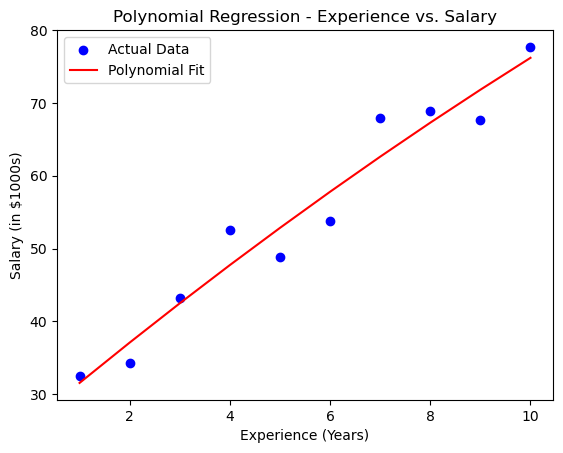

In [39]:
# Step 7: Predict values using the Polynomial Regression model
Y_pred = model.predict(X_poly)  # Predict using the polynomial features

# Step 8: Plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data')  # Scatter plot of actual values

# Step 9: Plot the Polynomial Regression line (best fit curve)
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')  # Polynomial regression curve

# Step 10: Add labels and legend
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (in $1000s)')
plt.title('Polynomial Regression - Experience vs. Salary')
plt.legend()

# Step 11: Display the graph
plt.show()


In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'poly' is the PolynomialFeatures instance used during training
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit): "))
        if exp <= -1:
            print("Exiting the prediction tool.")
            break
        
        # Transform the input experience into polynomial features
        exp_poly = poly.transform(np.array([[exp]]))  # Transform input to polynomial features
        predicted_salary = model.predict(exp_poly)[0]  # Predict using the trained model
        
        print(f"Predicted salary for {exp:.1f} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number.")



Enter years of experience to predict salary (or -1 to exit):  5


Predicted salary for 5.0 years of experience: $52.84K



Enter years of experience to predict salary (or -1 to exit):  -1


Exiting the prediction tool.


In [43]:
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11.47


In [45]:
mae = mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.98


In [47]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.39


In [49]:
r2 = r2_score(Y, Y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.95


In [51]:
n=len(Y) #Number of observations
p=1 #Number of independent variables (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-squared: {adj_r2:.2f}')

Adjusted R-squared: 0.94


In [53]:
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        13:44:20   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\Proxy1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
